In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
import matplotlib.cm as cm
import math
import requests
import json
from networkx.readwrite import json_graph

In this notebook we are going to take a look at some of what we can do with network dynamics, using the ability to associate values to the nodes and edges to explore random walks, heat diffusion, and epidemic modeling. Some widgets with expanded options exploring these topics can be found: 
*    http://math.wsu.edu/faculty/ddeford/mcmc_intro.php
*    http://math.wsu.edu/faculty/ddeford/diff_force.html
*    http://math.wsu.edu/faculty/ddeford/epi.html

respectively. For some more details about the underlying mathematics, see these notes: https://github.com/drdeford/Math_581_05/blob/master/Week_5/581_Dynamics.pdf

**Random Walks:** Our goal here is to simulate and evaluate the behavior of the simple random walk on a graph, where at each step the walker chooses uniformly from the neighbors of the current node. 

In [2]:
g = nx.grid_graph([4,4])
g.add_edge((0,0),(1,1))
#Add a triangle so the graph isn't bipartite

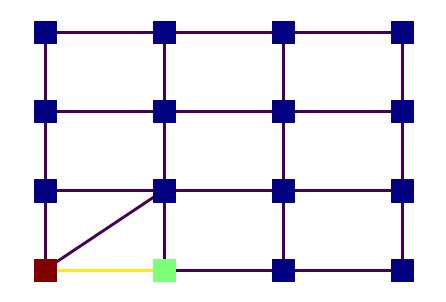

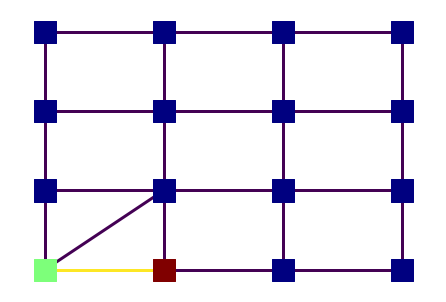

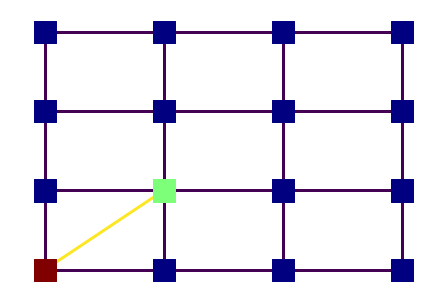

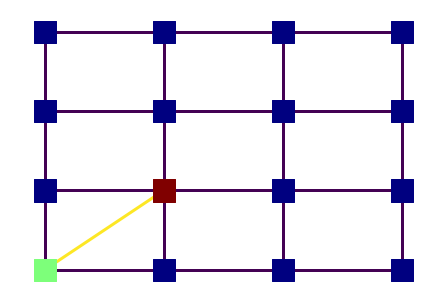

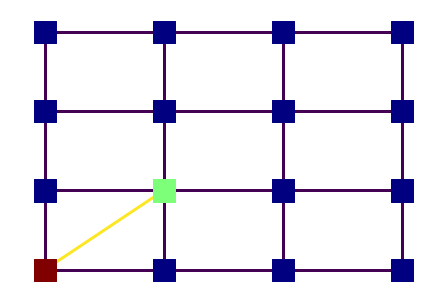

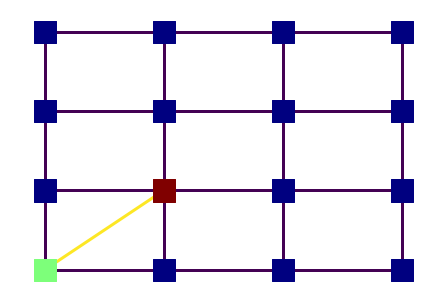

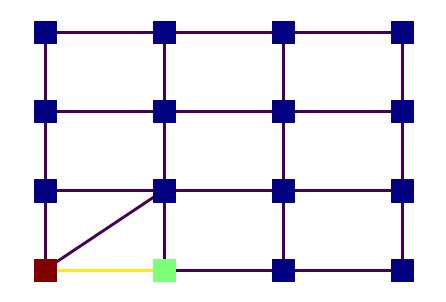

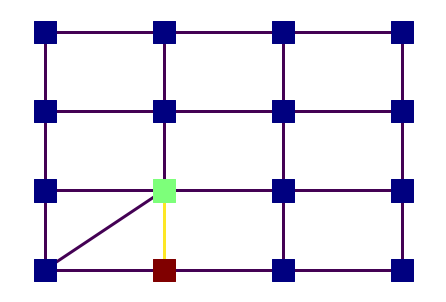

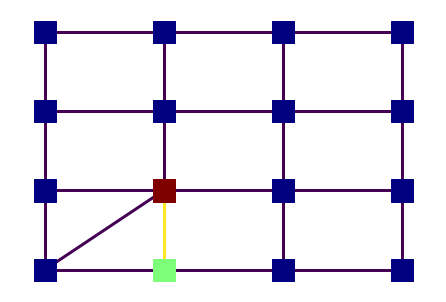

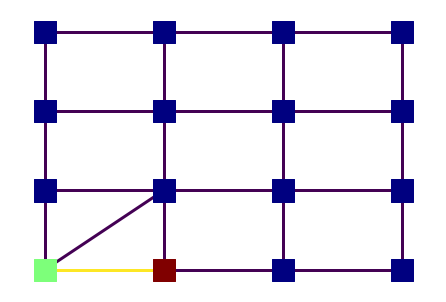

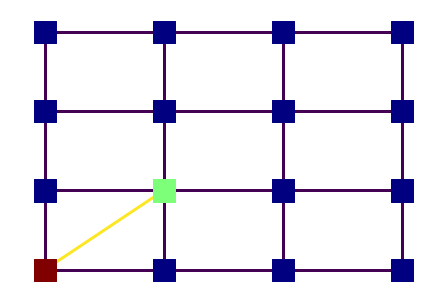

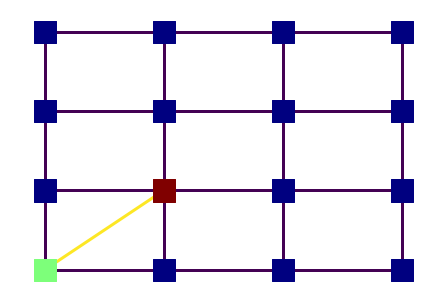

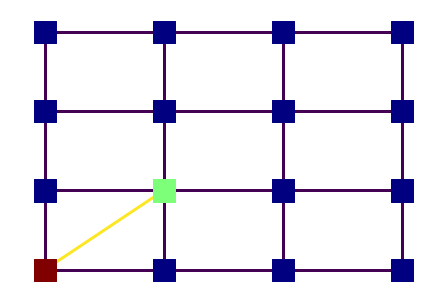

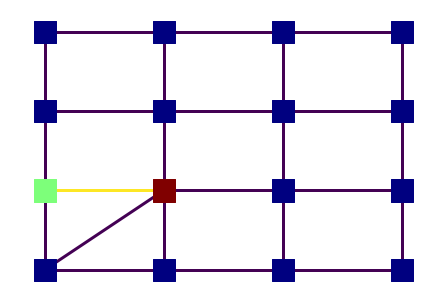

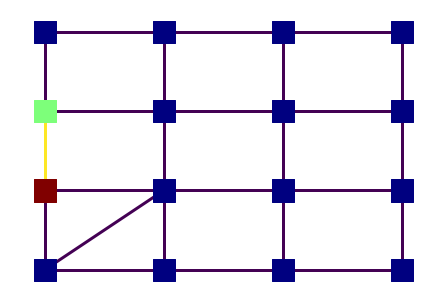

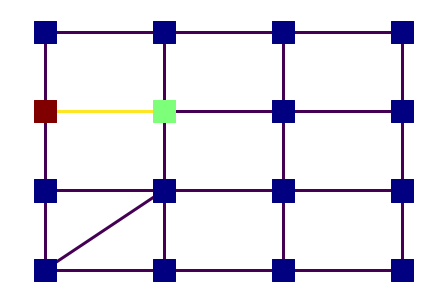

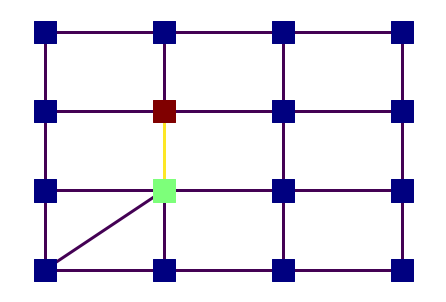

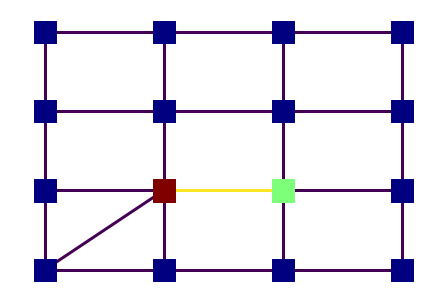

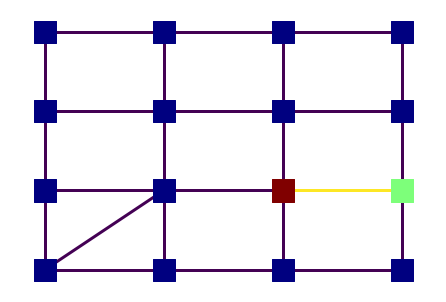

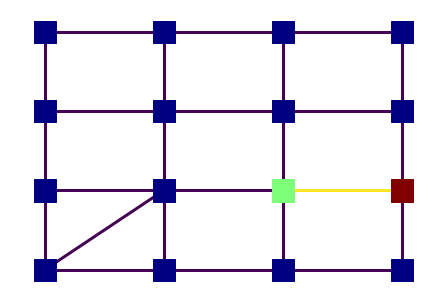

In [3]:
#Simulate a trace of the Markov chain
state = random.choice(list(g.nodes()))

for i in range(20):
    node_colors = {x:0 for x in g.nodes}
    edge_colors = {x:0 for x in g.edges}
    old_state = state
    
    state = random.choice(list(g.neighbors(state)))
    
    edge_colors[(old_state, state)]= 1
    edge_colors[(state, old_state)]= 1
    node_colors[old_state] = 2
    node_colors[state]=1
    plt.figure()
    nx.draw(g,pos = {x:x for x in g.nodes()}, node_color = [node_colors[x] for x in g.nodes()],edge_color = [edge_colors[x] for x in g.edges()],
        width =3, cmap="jet", node_size=500,node_shape='s')
    plt.show()

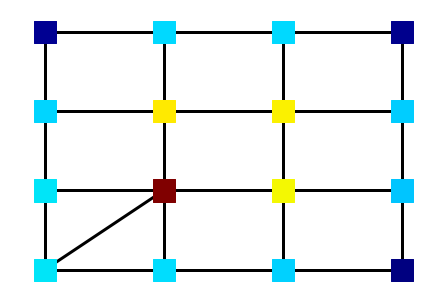

In [4]:
#Record the states visited in a very long walk

node_colors = {x:0 for x in g.nodes}
state = random.choice(list(g.nodes()))

for sample in range(200000):
    
    old_state = state

    state = random.choice(list(g.neighbors(state)))
    node_colors[state] +=1
    

plt.figure()
nx.draw(g,pos = {x:x for x in g.nodes()}, node_color = [node_colors[x] for x in g.nodes()],width =3, cmap="jet", node_size=500,node_shape='s')
plt.show()        
    


[[0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]


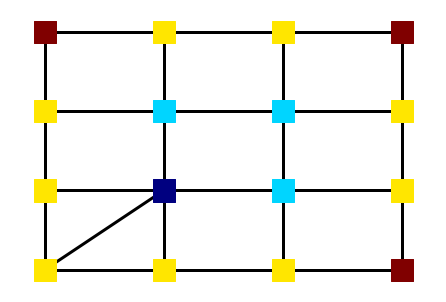

In [5]:
#Compare to theoretical steady state from eigenvector
A = nx.adjacency_matrix(g).todense()
A = A.astype(float)
print(A)
for i in range(len(A)):
    A[i]=A[i]/(A[i].sum())
    
#np.set_printoptions(precision=2)
#print(A)

D, V = LA.eig(A.T)

plt.figure()
nx.draw(g,pos = {x:x for x in g.nodes()}, node_color = [-V[x,0] for x in range(16)],width =3, cmap="jet", node_size=500,node_shape='s')
plt.show()        


**Assignment:** Repeat the experiment above with the Karate club network instead of the grid. Compare the final plot that you get to the plot of degree centrality in 2_Social_Networks.ipynb. What do you notice?

**Heat Diffusion:** Next we simulate heat diffusion on a network, where the change in temperature at each node is proportional to the differences between that node and its neighbors as a natural extension of the continuous Laplacian operator. 

In [6]:
g = nx.grid_graph([20,20])
num_steps = 200
divisor = 50
plot_skip = 10
#Building a 400 node grid graph and setting the number of steps to simulate

In [7]:
L = nx.laplacian_matrix(g).todense()
D, V = LA.eigh(L)
T0 = np.zeros([len(g),1]) +.001
T0[200,0]=10
T0[100,0]=10
T0[120,0]=10
T0[333,0]=10

#Build the laplacian and set some initial conditions to have positive temperature

In [8]:
top = T0.max()
bottom = T0.min()
cnorm = mpl.colors.Normalize(vmin=bottom,vmax=top)
cnorm = mpl.colors.LogNorm(vmin=.0001,vmax=top)
cmap=cm.jet
m = cm.ScalarMappable(norm=cnorm, cmap=cmap)
#Obnoxious normalization required to keep the color scale going correctly

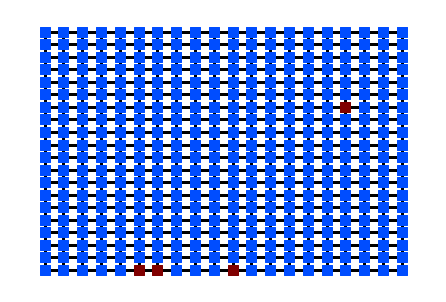

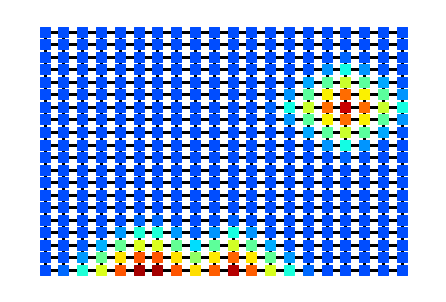

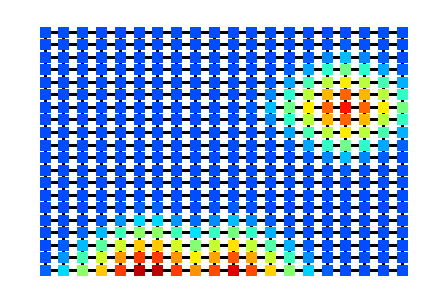

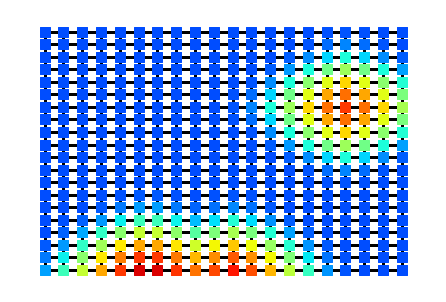

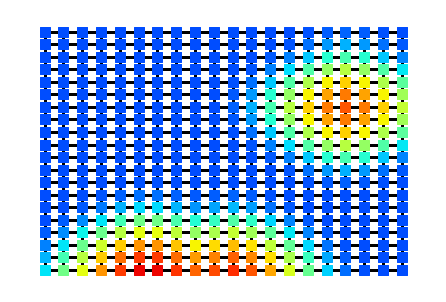

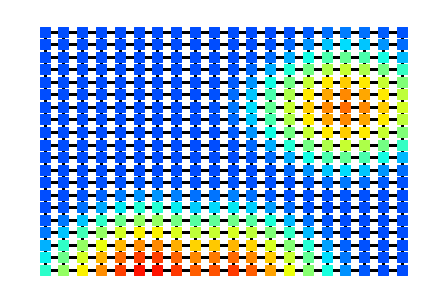

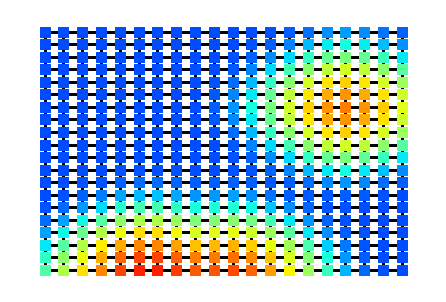

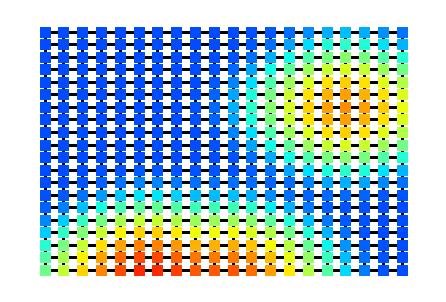

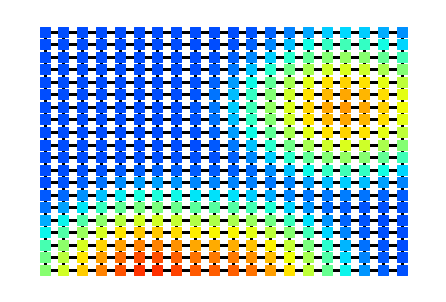

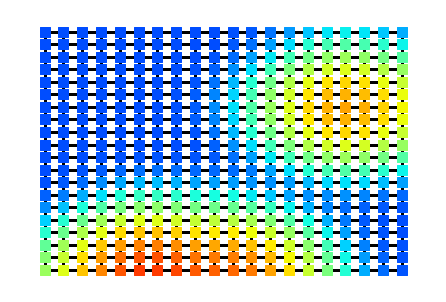

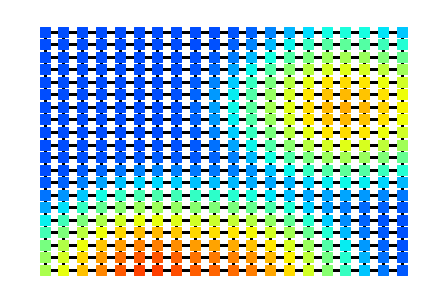

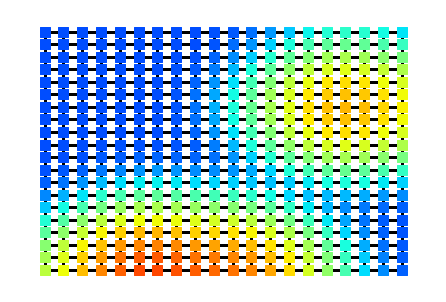

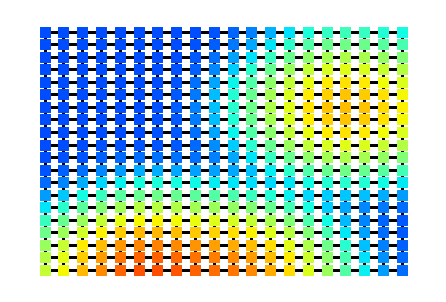

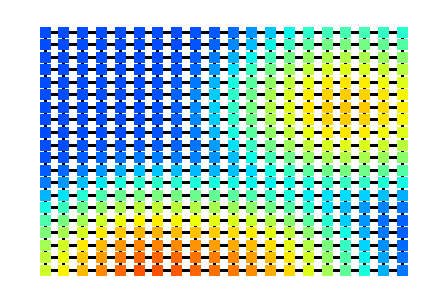

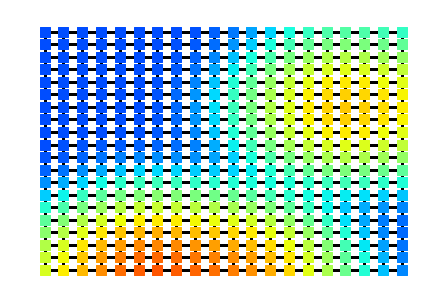

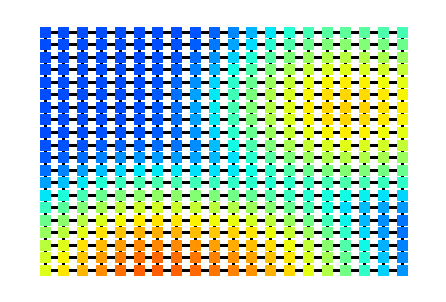

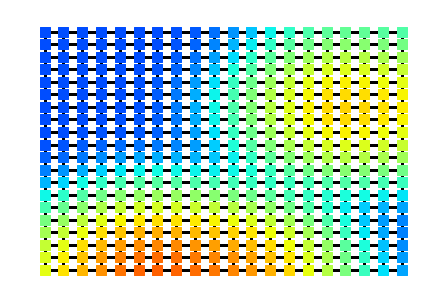

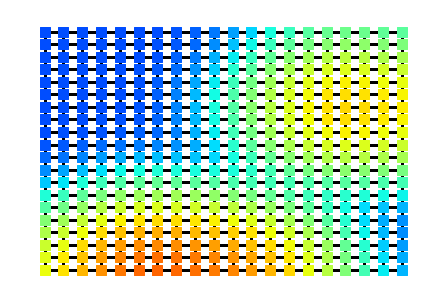

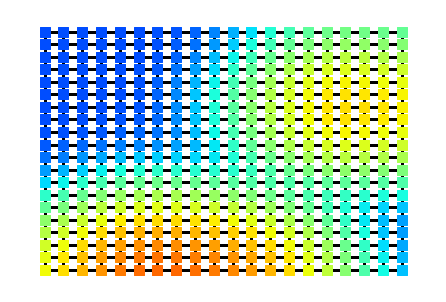

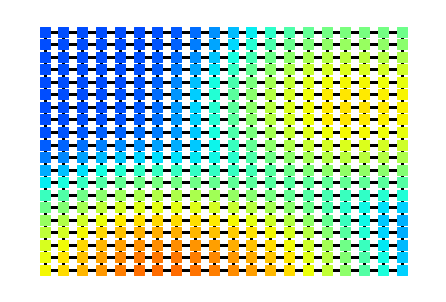

In [9]:
#To generate local images and run the dynamics motivated by MatLab example:
# https://en.wikipedia.org/wiki/Laplacian_matrix
T0V=np.dot(np.transpose(V),T0)
Phi=np.zeros([len(g),1])
for s in range(num_steps):
    t = float(s)/divisor
    for i in range(len(g)):
        Phi[i]=T0V[i]*(math.exp((-D[i]*t)))
    Phi=np.dot(V,Phi)
    Phi2=list(Phi)
    
    
    
    if s% plot_skip == 0:
        temp = []
        for i in range(len(g)):
            temp.append(float(cnorm(Phi2[i])))
        plt.figure()
        nx.draw(g,pos = {x:x for x in g.nodes()}, node_color = temp,vmin=0,vmax=1,width =3,cmap='jet',node_shape='s',node_size=100)
        plt.show()


**Assignment:** Repeat the experiment by changing the initial conditions (both positions and temperatures). What do you notice? How large do you have to set the number of steps until the final figure is visually monochromatic?

**Digression - Spectral Clustering** We can't talk about the Laplacian without taking a short trip to go see an example of spectral clustering, particularly since matching up the networkx objects with the linear algebra can be a little awkward without some guidance. The following cells walk through one approach to doing partioning of the Karate club graph with networkx and Python. This concept is explored further in the next notebook, using some of the built-in networkx functions. 

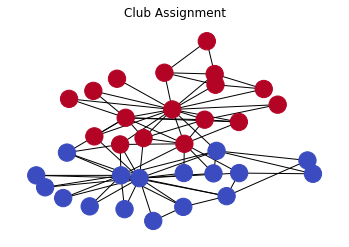

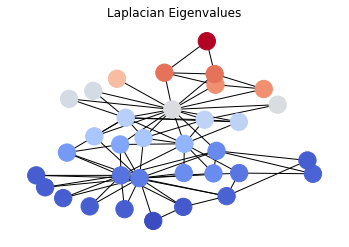

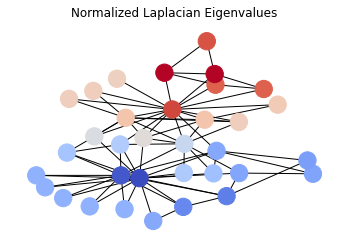

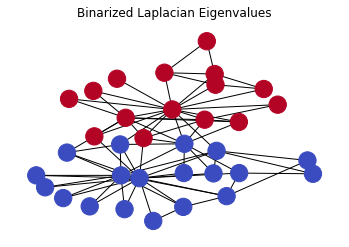

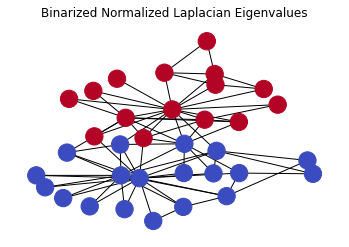

In [10]:
#We partition the nodes in the graph using the Fiedler vector of the (normalized) Laplacian 
#(the eigenvector that corresponds to the smallest non-zero eigenvalue.)
G = nx.karate_club_graph()
karate_kk_layout = nx.kamada_kawai_layout(G)


AM = nx.adjacency_matrix(G)
NLM = (nx.normalized_laplacian_matrix(G)).todense()
LM = (nx.laplacian_matrix(G)).todense()



plt.figure()
plt.title("Club Assignment")
nx.draw(G,pos=karate_kk_layout, node_color=[G.nodes[x]['club'] == 'Mr. Hi' for x in G.nodes()], cmap='coolwarm' )
plt.show()

NLMva, NLMve = LA.eigh(NLM)

LMva, LMve = LA.eigh(LM)

Fv = LMve[:,1]
xFv = [-Fv.item(x) for x in range(34)]
NFv = NLMve[:,1]
xNFv = [NFv.item(x) for x in range(34)]

plt.figure()
plt.title("Laplacian Eigenvalues")
nx.draw(G,pos=karate_kk_layout, node_color=xFv, cmap='coolwarm' )
plt.show()

plt.figure()
plt.title("Normalized Laplacian Eigenvalues")
nx.draw(G,pos=karate_kk_layout,node_color= xNFv, cmap='coolwarm')
plt.show()

plt.figure()
plt.title("Binarized Laplacian Eigenvalues")
nx.draw(G, pos=karate_kk_layout,node_color=[xFv[x] > 0 for x in range(34)], cmap='coolwarm' )
plt.show()

plt.figure()
plt.title("Binarized Normalized Laplacian Eigenvalues")
nx.draw(G,pos=karate_kk_layout,node_color= [xNFv[x] > 0 for x in range(34)], cmap='coolwarm')
plt.show()



**Assignment:** Replace the Karate club with the dolphin graph and redo the spectral partitioning. Does the output seem to reflect the structure you observe in the network?

**Epidemics:** Finally, we show simulations of a network-variant of the SIR model. More description of this model and the corresponding parameters can be found here:  http://math.wsu.edu/faculty/ddeford/epi.html


In [11]:
g = nx.grid_graph([10,10])
SD = False
sg = "'COUNTY/COUNTY_05.json'"
SI=4
SR = 0
gamma = .06
beta = .05
num_steps = 100
stp = 10
useR = True
spontaneous = 0
snodes = 200

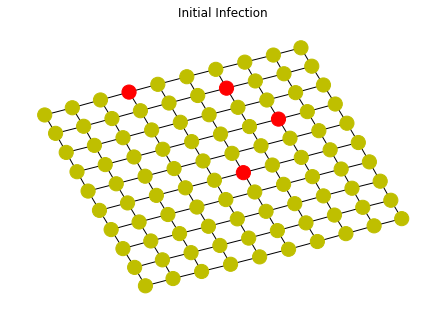

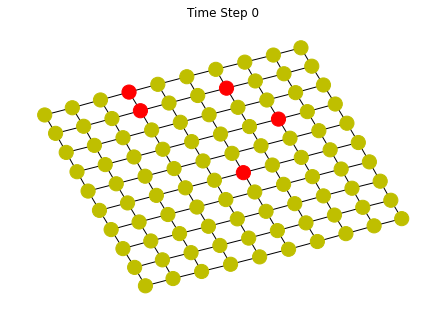

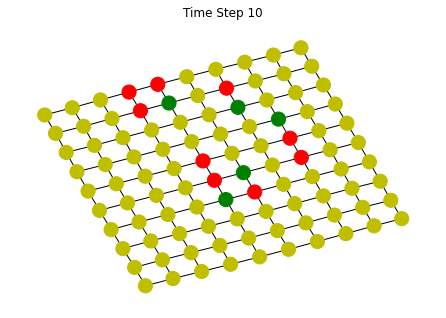

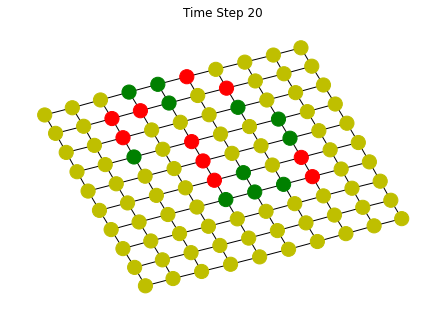

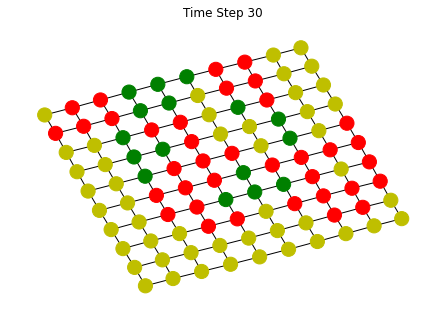

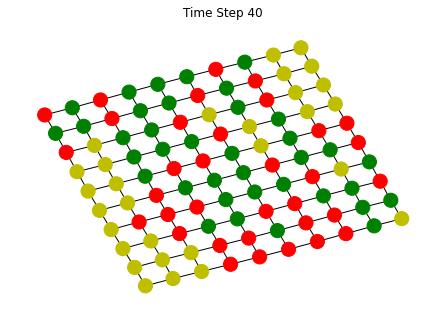

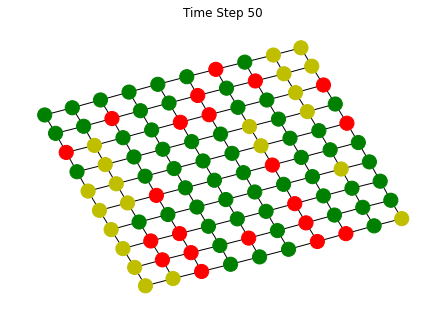

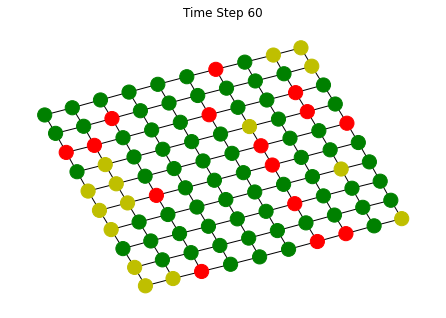

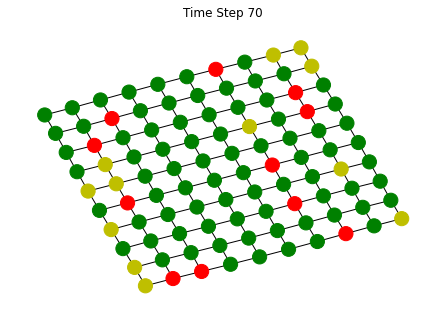

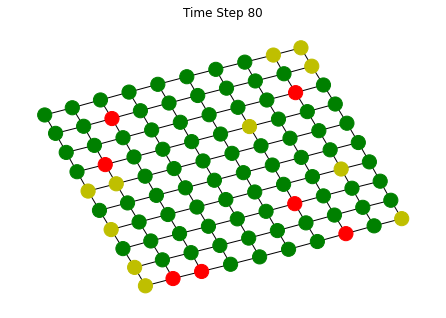

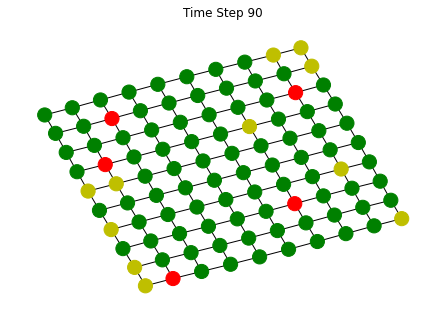

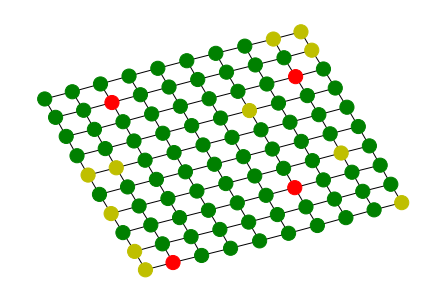

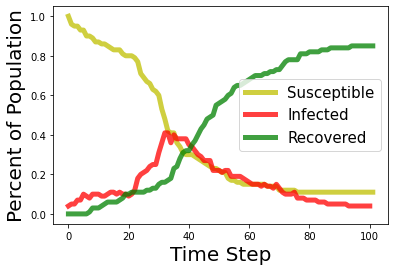

In [12]:
if SD == True:

    url = "https://people.csail.mit.edu/ddeford/" + sg
    r = requests.get(url)
    data = r.json()
    g = json_graph.adjacency_graph(data)

shape = False

nlist = list(g.nodes())
n = len(nlist)




if SD == False:
    pos = nx.kamada_kawai_layout(g)
else:
    pos = {x:(g.nodes[x]['C_X'],g.nodes[x]['C_Y']) for x in g.nodes()}




initial_infection = SI
initial_R = SR
recover = beta
spread = gamma
reinfect = not useR#True#False

S={n for n in nlist}
I=set()
R=set()

Ss=[len(g.nodes())]
Is=[]
Rs=[0]

ncs = {x:0 for x in nlist}

num_steps = 100

colordict= {0:'y',1:'r',2:'g'}


for i in range(initial_infection):
    infected = random.choice(nlist)
    ncs[infected] = 1
    I.add(infected)
    S.remove(infected)


for i in range(initial_R):
    immune = random.choice(list(S))
    ncs[immune] = 2
    R.add(immune)
    S.remove(immune)

Ss.append(len(S))
Is.append(len(I))
Rs.append(len(R))




plt.figure()
nx.draw(g,pos=pos,node_color=[colordict[ncs[x]] for x in nlist],node_size = snodes)
plt.title("Initial Infection")
plt.show()


for step in range(num_steps):

    for i in range(n):
        if ncs[nlist[i]] == 1:
            if random.random() < recover:
                if reinfect:
                    ncs[nlist[i]] = 0
                    I.remove(nlist[i])
                    S.add(nlist[i])
                else:
                    ncs[nlist[i]] = 2
                    I.remove(nlist[i])
                    R.add(nlist[i])
        elif ncs[nlist[i]] == 0:
            sick = 0
            for neighbor in g.neighbors(nlist[i]):
                if ncs[neighbor] == 1:
                    if np.random.binomial(1,spread) == 1:
                        sick = 1  
                        I.add(nlist[i])
                        S.remove(nlist[i])
                        break
            ncs[nlist[i]] = sick

    Ss.append(len(S))
    Is.append(len(I))
    Rs.append(len(R))

    if step %int(num_steps/stp) == 0:
        plt.figure()
        nx.draw(g,pos=pos,node_color=[colordict[ncs[x]] for x in nlist],node_size = snodes)
        plt.title("Time Step " + str(step))
        plt.show()


    if spontaneous > 0:
        num_infect = np.random.binomial(Ss[-1],spontaneous)
        for j in range(num_infect):
            infected = random.choice(list(S))
            ncs[infected] = 1
            I.add(infected)
            S.remove(infected)


    elif Is[-1]==0:
        break

nx.draw(g,pos=pos,node_color=[colordict[ncs[x]] for x in nlist],node_size = snodes)
plt.show()


plt.figure()
plt.plot([x/n for x in Ss],alpha=0.75, color = 'y', lw = 5, label='Susceptible')           
plt.plot([x/n for x in Is],alpha=0.75, color = 'r', lw = 5, label='Infected')   
plt.plot([x/n for x in Rs],alpha=0.75, color = 'g', lw = 5, label='Recovered')    
plt.legend(fontsize=15)
plt.ylabel("Percent of Population", fontsize = 20)
plt.xlabel("Time Step", fontsize = 20)
plt.show()

**Assignment:** Try adapting the parameters in the first cell and rerun the model a few times. Can you find a setting that consistently gets everyone infected at once? How about a setting where fewer than half of the nodes ever get infected? Next, replace the grid graph with the Arkansas County graph and rerun the SIR model. How does the behavior differ on this non-lattice graph?

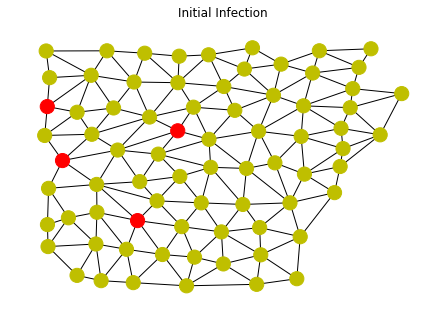

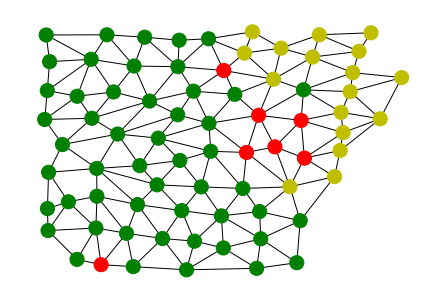

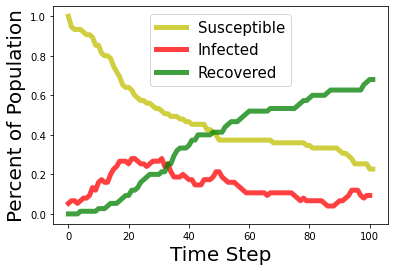

In [13]:
g = nx.grid_graph([10,10])
SD = True#False
sg = 'COUNTY/COUNTY_05.json'
SI=4
SR = 0
gamma = .06
beta = .05
num_steps = 100
stp = 100
useR = True
spontaneous = 0
snodes = 200
ind = 0
if SD == True:

    url = "https://people.csail.mit.edu/ddeford/" + sg
    r = requests.get(url)
    data = r.json()
    g = json_graph.adjacency_graph(data)

shape = False

nlist = list(g.nodes())
n = len(nlist)




if SD == False:
    pos = nx.kamada_kawai_layout(g)
else:
    pos = {x:(g.nodes[x]['C_X'],g.nodes[x]['C_Y']) for x in g.nodes()}




initial_infection = SI
initial_R = SR
recover = beta
spread = gamma
reinfect = not useR#True#False

S={n for n in nlist}
I=set()
R=set()

Ss=[len(g.nodes())]
Is=[]
Rs=[0]

ncs = {x:0 for x in nlist}

num_steps = 100

colordict= {0:'y',1:'r',2:'g'}


for i in range(initial_infection):
    infected = random.choice(nlist)
    ncs[infected] = 1
    I.add(infected)
    S.remove(infected)


for i in range(initial_R):
    immune = random.choice(list(S))
    ncs[immune] = 2
    R.add(immune)
    S.remove(immune)

Ss.append(len(S))
Is.append(len(I))
Rs.append(len(R))




plt.figure()
nx.draw(g,pos=pos,node_color=[colordict[ncs[x]] for x in nlist],node_size = snodes)
plt.title("Initial Infection")
plt.show()


for step in range(num_steps):

    for i in range(n):
        if ncs[nlist[i]] == 1:
            if random.random() < recover:
                if reinfect:
                    ncs[nlist[i]] = 0
                    I.remove(nlist[i])
                    S.add(nlist[i])
                else:
                    ncs[nlist[i]] = 2
                    I.remove(nlist[i])
                    R.add(nlist[i])
        elif ncs[nlist[i]] == 0:
            sick = 0
            for neighbor in g.neighbors(nlist[i]):
                if ncs[neighbor] == 1:
                    if np.random.binomial(1,spread) == 1:
                        sick = 1  
                        I.add(nlist[i])
                        S.remove(nlist[i])
                        break
            ncs[nlist[i]] = sick

    Ss.append(len(S))
    Is.append(len(I))
    Rs.append(len(R))

    if step %int(num_steps/stp) == 0:
        
        plt.figure()
        nx.draw(g,pos=pos,node_color=[colordict[ncs[x]] for x in nlist],node_size = snodes)
        plt.title("Time Step " + str(step))
        plt.savefig(f"./Figures/fig{ind:03}")
        plt.close()
        ind +=1


    if spontaneous > 0:
        num_infect = np.random.binomial(Ss[-1],spontaneous)
        for j in range(num_infect):
            infected = random.choice(list(S))
            ncs[infected] = 1
            I.add(infected)
            S.remove(infected)


    elif Is[-1]==0:
        break

nx.draw(g,pos=pos,node_color=[colordict[ncs[x]] for x in nlist],node_size = snodes)
plt.show()


plt.figure()
plt.plot([x/n for x in Ss],alpha=0.75, color = 'y', lw = 5, label='Susceptible')           
plt.plot([x/n for x in Is],alpha=0.75, color = 'r', lw = 5, label='Infected')   
plt.plot([x/n for x in Rs],alpha=0.75, color = 'g', lw = 5, label='Recovered')    
plt.legend(fontsize=15)
plt.ylabel("Percent of Population", fontsize = 20)
plt.xlabel("Time Step", fontsize = 20)
plt.show()


# you can compile the .pngs together into a .gif with commands like the following: 
#ffmpeg -i fig%3d.png animation.gif
#ffmpeg -i fig%3d.png -vf "fps=20,scale=320:-1:flags=lanczos,split[s0][s1];[s0]palettegen[p];[s1][p]paletteuse" animation.gif